In [57]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
def read_wandb_csv():
    df = pd.read_csv("wandb_export.csv")
    target_cols = [el for el in df.columns if "mean" in el[-4:]]

    target_cols.append("epoch_id")
    filtered_df = df[target_cols]

    return filtered_df

In [3]:
def rename_fn(input_str):
    if input_str == "epoch_id":
        return input_str
    str_list = input_str.split('-')
    out = "-".join([str_list[0], str_list[1]])
    return out

In [4]:
mydf = read_wandb_csv()
df = mydf.rename(columns=lambda s: rename_fn(s))
df = df.melt(id_vars="epoch_id")
out = df.rename(columns={"variable": "wandb-run", "value": "Perf"})
out['Train'] = None
out['Encoder'] = None
out

,epoch_id,wandb-run,Perf,Train,Encoder
0,0,breezy-cloud,1.260184,None,None
1,10,breezy-cloud,2.970999,None,None
2,20,breezy-cloud,2.776531,None,None
3,30,breezy-cloud,2.841402,None,None
4,40,breezy-cloud,2.898227,None,None
...,...,...,...,...,...
4209,2960,floral-salad,1.159024,None,None
4210,2970,floral-salad,1.161539,None,None
4211,2980,floral-salad,1.137764,None,None
4212,2990,floral-salad,1.160617,None,None


In [16]:
# run_names = [
#     'breezy-cloud', 
#     'rare-waterfall', 
#     'fast-waterfall',
#     'elated-dragon', 
#     'super-fog', 
#     'legendary-terrain', 
#     'deep-forest',
#     'misunderstood-river', 
#     'ethereal-eon',
#     'worthy-tree',
#     'giddy-yogurt', 
#     'fallen-snowflake', 
#     'crimson-smoke',
#     'floral-salad'
# ]
mitga_runs = [
    'breezy-cloud', 
    'rare-waterfall',
    'fast-waterfall',
    'ethereal-eon',
    'worthy-tree',
    'giddy-yogurt', 
    'floral-salad'
    ]

gn_runs = [
    'elated-dragon', 
    'super-fog', 
    'legendary-terrain', 
    'deep-forest',
    'misunderstood-river', 
    'fallen-snowflake', 
    'crimson-smoke',
]
ppo_runs = [
    'breezy-cloud', 
    'rare-waterfall', 
    'fast-waterfall',
    'elated-dragon', 
    'super-fog', 
    'legendary-terrain', 
    'deep-forest',

]
cr_runs = [
    'misunderstood-river', 
    'ethereal-eon',
    'worthy-tree',
    'giddy-yogurt', 
    'fallen-snowflake', 
    'crimson-smoke',
    'floral-salad'
]
def map_train(run_name):
    if run_name in ppo_runs:
        return "PPO"
    else:
        return "CR"

def map_encoder(run_name):
    if run_name in mitga_runs:
        return "MITGA"
    else:
        return "GN"
    

In [41]:
out['Train'] = out['wandb-run'].apply(map_train)
out['Encoder'] = out['wandb-run'].apply(map_encoder)
out['Type'] = out['Train'].astype(str) + "-" + out['Encoder'].astype(str)

cr_mitga_mask = out["Type"] == "CR-MITGA"
out["Type"][cr_mitga_mask] = "ScheduleNet"
ppo_mitga_mask = out["Type"] == "PPO-MITGA"
out = out[~ppo_mitga_mask]


Text(0, 0.5, 'Norm. Validation performance')

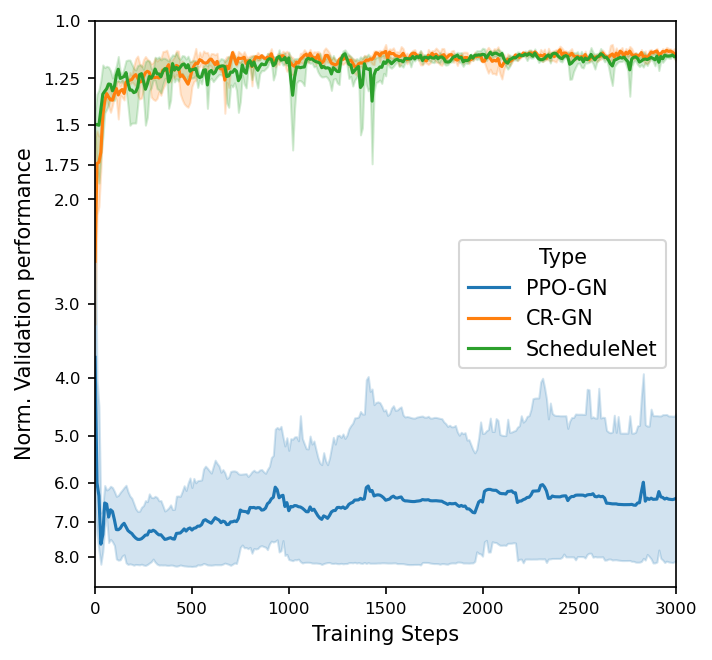

In [51]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.xaxis.set_minor_locator(MultipleLocator(5))
fig, ax = plt.subplots(1,1, figsize=(5, 5), dpi=150)
ax = sns.lineplot(data=out, x="epoch_id", y="Perf", hue="Type", ax=ax)
c = np.concatenate([np.arange(1.0, 2.0, 0.25), np.arange(2, 9, 1)])
# ax.yaxis.set_ticks() 
# ax.yaxis.set_ticklabels(c.astype('str'))
ax.set_yscale('log', base=0.5)
ax.yaxis.set_major_locator(plt.FixedLocator(c))
ax.yaxis.set_major_formatter(plt.FixedFormatter(c))
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xlim([0, 3000])
plt.ylim([1, 9])
plt.xlabel("Training Steps")
plt.ylabel("Norm. Validation performance")
# plt.gca().invert_yaxis()

In [88]:
annote_size = 12
def annotate_label(bar, value, size):
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(value),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                size=size,
                textcoords="offset points",
                ha='center', va='bottom')

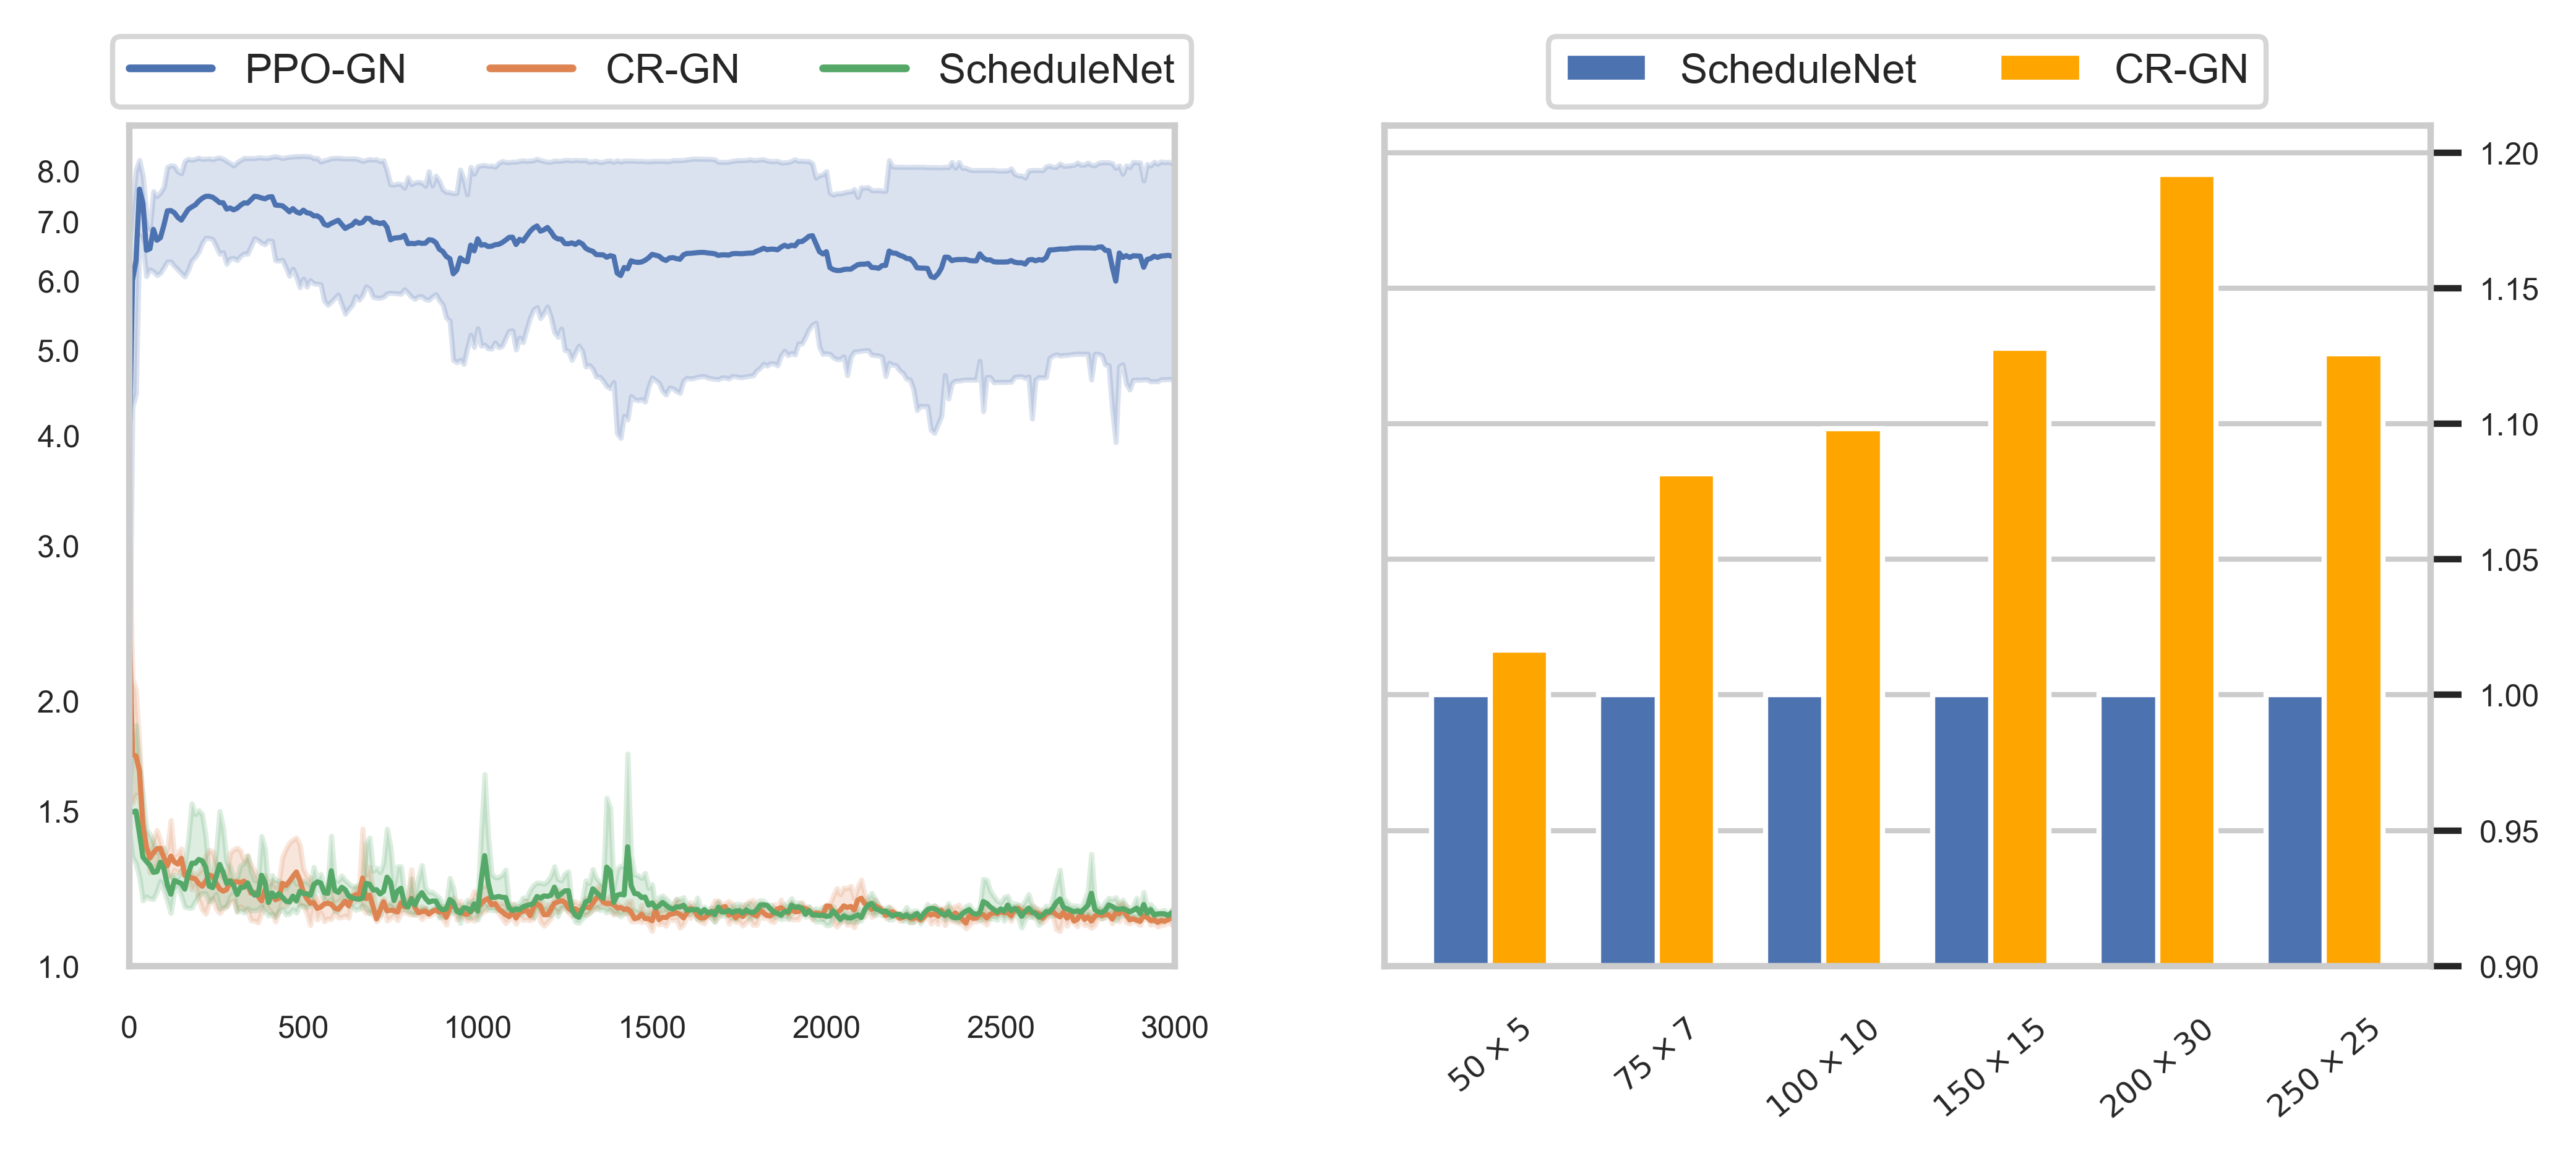

In [99]:
fig, axes = plt.subplots(1,2, figsize=(8,3), gridspec_kw={'width_ratios':[0.5, 0.5]}, dpi=600)
ax0, ax1 = axes
sizes = [r'$50\times5$', r'$75\times7$', r'$100\times10$', r'$150\times15$', r'$200\times30$', r'$250\times25$']
bar_width = 0.35
snet_makespans = np.array([2.375708, 2.235567, 2.216094, 2.251764, 2.15679, 2.23078])
crgn_makespans = np.array([2.415008, 2.417829, 2.433898, 2.539378, 2.570651, 2.511318])

snet_perf = np.ones(len(snet_makespans))
crgn_perf = crgn_makespans/snet_makespans

# fig, ax = plt.subplots(1,1)
mm_bars = ax1.bar(np.arange(6) - bar_width/2, snet_perf, bar_width, color='b', label='ScheduleNet')
okay_bars = ax1.bar(np.arange(6) + bar_width/2, crgn_perf, bar_width, color='orange', label='CR-GN')
ax1.set_xticks(np.arange(6))
ax1.set_xticklabels(sizes, rotation=40)
ax1.yaxis.tick_right()
ax1.grid(axis='x')
ax1.set_ylim(0.9, 1.21)
# ax1.set_ylabel('Scheduling Performance')
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.legend(ncol=2, bbox_to_anchor=(0.5, 1.13), loc='upper center', prop={'size': 8})

# put labels
for ii, bar in enumerate(okay_bars):        
    annotate_label(bar, crgn_perf[ii], annote_size)        


ax0.xaxis.set_minor_locator(MultipleLocator(5))
ax0 = sns.lineplot(data=out, x="epoch_id", y="Perf", hue="Type", ax=ax0, lw=1)
c = np.concatenate([np.arange(1.0, 2.0, 0.5), np.arange(2, 9, 1)])
ax0.set_yscale('log')
ax0.yaxis.set_major_locator(plt.FixedLocator(c))
ax0.yaxis.set_major_formatter(plt.FixedFormatter(c))
ax0.tick_params(axis='both', which='major', labelsize=6)
ax0.grid(False)
ax0.set(xlabel='', ylabel='')
ax0.set_xlim([0, 3000])
ax0.set_ylim([1, 9])
ax0.legend(ncol=3, bbox_to_anchor=(0.5, 1.13), loc='upper center', prop={'size': 8})
# fig.legend(mm_bars, ['s','c','p'])

# plt.xlabel("Training Steps")
# plt.ylabel("Norm. Validation performance")
# plt.gca().invert_yaxis()

Text(0, 0.5, 'Norm. Validation performance')

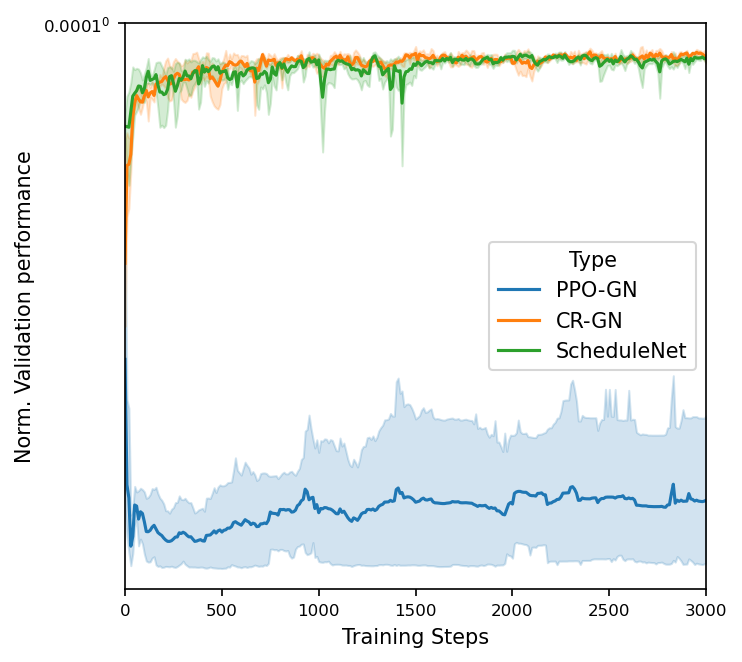

In [54]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.xaxis.set_minor_locator(MultipleLocator(5))
fig, ax = plt.subplots(1,1, figsize=(5, 5), dpi=150)
ax = sns.lineplot(data=out, x="epoch_id", y="Perf", hue="Type", ax=ax)
c = np.concatenate([np.arange(1.0, 2.0, 0.25), np.arange(2, 9, 1)])
ax.set_yscale('log', base=0.0001)
# ax.yaxis.set_major_locator(plt.FixedLocator(c))
# ax.yaxis.set_major_formatter(plt.FixedFormatter(c))
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xlim([0, 3000])
plt.ylim([1, 9])
plt.xlabel("Training Steps")
plt.ylabel("Norm. Validation performance")
# plt.gca().invert_yaxis()